In [ ]:
#load relevant packages 
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import sklearn
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score, roc_curve


import matplotlib as mpl
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from numpy import random
from scipy import linalg
from numpy import arange

import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from plotnine import *
import plotnine








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#get data
train = pd.read_csv("/rds/general/project/hda-22-23/live/TDS/Group6/Data/training_clustered.csv")
train.head(10)

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,...,Ethnicity,Alcohol_status,BMI,Smoke_pack_years,Sex,deprivation_score,Age_recr,case_status,type,cluster
0,6.90,4.700,15.90,212.0,1.40,0.40,5.00,0.00,0.00,0.0,...,1,1,29.5254,41.250,1,16.9625,63.0,0.0,None,3
1,7.65,5.007,16.01,251.1,2.00,0.68,4.55,0.34,0.08,0.0,...,1,1,32.9796,18.000,1,3.0900,70.0,0.0,None,1
2,4.50,4.170,13.70,286.0,1.70,0.40,2.30,0.00,0.00,0.0,...,1,1,20.8999,28.750,0,7.1900,57.0,0.0,None,3
3,5.00,4.440,12.90,346.0,1.60,0.50,2.80,0.10,0.00,0.0,...,1,1,25.5132,63.750,0,6.3100,59.0,1.0,Lymphoma,3
4,7.73,4.305,14.18,408.3,2.72,0.67,4.15,0.17,0.03,0.0,...,1,1,24.4389,44.500,0,3.7900,58.0,0.0,None,0
5,5.60,4.320,14.10,173.0,1.10,0.30,4.10,0.00,0.10,0.0,...,1,1,23.6894,18.375,1,9.4976,69.0,0.0,None,1
6,6.44,3.900,12.04,201.5,1.69,0.39,3.82,0.50,0.04,0.0,...,1,3,28.4763,14.000,0,11.6800,66.0,0.0,None,1
7,8.10,4.380,13.91,315.1,1.74,0.83,5.36,0.11,0.07,0.0,...,1,1,28.2646,12.500,0,0.0000,67.0,0.0,None,1
8,8.10,4.920,14.20,212.0,2.60,0.50,4.60,0.30,0.00,0.0,...,1,1,30.4255,48.500,1,22.4000,60.0,1.0,Leukaemia,3
9,7.99,4.231,13.34,240.3,2.44,0.23,4.96,0.33,0.04,0.0,...,1,1,23.7037,16.250,0,19.4700,69.0,0.0,None,1


In [ ]:
#k means data
train = pd.read_csv("/rds/general/project/hda-22-23/live/TDS/Group6/Data/training_clustered_new_kmeans.csv", index_col=0)
train.head(10)

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,...,Alcohol_status,BMI,Smoke_pack_years,Sex,deprivation_score,Age_recr,case_status,type,cluster,KMeans_cluster
0,0.070145,0.358307,1.303161,-0.595499,-0.873135,-0.500785,0.671718,-1.568482,-0.930459,-0.047855,...,1,29.5254,41.250,1,16.9625,63.0,0.0,None,2,2
1,0.537768,1.141564,1.397305,0.124259,0.091880,1.141761,0.313047,1.638708,1.567022,-0.047855,...,1,32.9796,18.000,1,3.0900,70.0,0.0,None,5,3
2,-1.426247,-0.993896,-0.579701,0.766702,-0.390627,-0.500785,-1.480306,-1.568482,-0.930459,-0.047855,...,1,20.8999,28.750,0,7.1900,57.0,0.0,None,2,4
3,-1.114499,-0.305038,-1.264378,1.871190,-0.551463,0.085838,-1.081783,-0.625191,-0.930459,-0.047855,...,1,25.5132,63.750,0,6.3100,59.0,1.0,Lymphoma,2,4
4,0.587647,-0.649467,-0.168894,3.018016,1.249899,1.083098,-0.005772,0.035113,0.006096,-0.047855,...,1,24.4389,44.500,0,3.7900,58.0,0.0,None,3,1
5,-0.740401,-0.611197,-0.237362,-1.313416,-1.355643,-1.087409,-0.045624,-1.568482,2.191392,-0.047855,...,1,23.6894,18.375,1,9.4976,69.0,0.0,None,1,0
6,-0.216664,-1.682754,-2.000406,-0.788784,-0.406711,-0.559448,-0.268797,3.147974,0.318281,-0.047855,...,3,28.4763,14.000,0,11.6800,66.0,0.0,None,5,1
7,0.818341,-0.458117,-0.399973,1.302379,-0.326293,2.021696,0.958654,-0.530862,1.254837,-0.047855,...,1,28.2646,12.500,0,0.0000,67.0,0.0,None,5,0
8,0.818341,0.919599,-0.151778,-0.595499,1.056896,0.085838,0.352899,1.261391,-0.930459,-0.047855,...,1,30.4255,48.500,1,22.4000,60.0,1.0,Leukaemia,2,3
9,0.749756,-0.838265,-0.887805,-0.074549,0.799559,-1.498046,0.639836,1.544379,0.318281,-0.047855,...,1,23.7037,16.250,0,19.4700,69.0,0.0,None,5,1


In [ ]:
test=pd.read_csv("/rds/general/project/hda-22-23/live/TDS/Group6/Data/test_clustered_identical_train.csv", index_col=0)
test.head(10)

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,...,Ethnicity,Alcohol_status,BMI,Smoke_pack_years,Sex,deprivation_score,Age_recr,case_status,type,cluster
0,10.31,5.366,17.05,258.5,2.46,0.83,6.24,0.59,0.18,0.0,...,1,1,27.6852,0.0,1,6.91000,65.0,0.0,None,5
1,7.17,4.257,14.05,311.6,2.04,0.32,4.70,0.11,0.02,0.0,...,1,1,22.4432,0.0,0,4.00000,67.0,0.0,None,3
2,7.68,5.127,15.96,179.2,1.36,0.45,5.60,0.16,0.10,0.0,...,3,2,21.9651,0.0,1,0.00000,51.0,0.0,None,1
3,5.70,4.470,13.80,342.0,1.30,0.70,3.30,0.20,0.10,0.0,...,1,1,28.2011,0.0,1,31.14000,64.0,0.0,None,0
4,8.28,4.232,13.61,243.2,2.07,0.41,5.66,0.12,0.02,0.0,...,1,1,29.6816,0.0,1,4.46000,45.0,0.0,None,3
5,5.54,4.949,14.40,252.9,1.48,0.43,3.53,0.09,0.02,0.0,...,1,1,31.2795,0.0,1,11.81000,47.0,0.0,None,3
6,3.90,4.500,14.00,269.0,1.00,0.20,2.50,0.10,0.00,0.0,...,1,1,25.5252,6.0,0,3.09913,65.0,0.0,None,2
7,4.98,4.722,15.29,388.4,1.12,0.47,3.10,0.29,0.01,0.0,...,1,1,18.4671,0.0,1,5.60000,66.0,0.0,None,5
8,7.02,4.639,15.15,291.8,1.63,0.64,4.58,0.15,0.02,0.0,...,2,1,26.8274,0.0,1,22.02000,50.0,0.0,None,3
9,6.30,4.410,13.20,361.0,2.10,0.50,3.50,0.10,0.00,0.0,...,1,1,24.5723,0.0,0,3.90646,68.0,0.0,None,2


In [ ]:
#k means data
test=pd.read_csv("/rds/general/project/hda-22-23/live/TDS/Group6/Data/test_clustered_identical_train_kmeans.csv", index_col=0)
test.head(10)

,WBC_count,red_blood_cell_count,haemoglobin_conc,platelet_count,lymphocyte_count,monocyte_count,neutrophil_count,eosinophil_count,basophil_count,nucleated_rbc_count,...,Alcohol_status,BMI,Smoke_pack_years,Sex,deprivation_score,Age_recr,case_status,type,cluster,KMeans_cluster
33,,,,,,,,,,,,,,,,,,,,,
0,1.945896,2.036258,2.317727,0.106037,0.652742,1.784046,1.506673,3.028734,2.959592,-0.082557,...,1,27.6852,0.0,1,6.91000,65,0,None,5,3
1,0.193700,-0.663228,-0.155190,1.024401,0.102667,-0.754996,0.382601,-0.466744,-0.273893,-0.082557,...,1,22.4432,0.0,0,4.00000,67,0,None,3,1
2,0.478292,1.454494,1.419234,-1.265455,-0.787931,-0.107790,1.039526,-0.102632,1.342850,-0.082557,...,2,21.9651,0.0,1,0.00000,51,0,None,1,2
3,-0.626596,-0.144751,-0.361266,1.550169,-0.866513,1.136839,-0.639283,0.188658,1.342850,-0.082557,...,1,28.2011,0.0,1,31.14000,64,0,None,0,0
4,0.813107,-0.724082,-0.517884,-0.158576,0.141958,-0.306930,1.083321,-0.393922,-0.273893,-0.082557,...,1,29.6816,0.0,1,4.46000,45,0,None,3,1
5,-0.715880,1.021213,0.133317,0.009186,-0.630767,-0.207360,-0.471402,-0.612389,-0.273893,-0.082557,...,1,31.2795,0.0,1,11.81000,47,0,None,3,2
6,-1.631039,-0.071726,-0.196405,0.287635,-1.259424,-1.352418,-1.223216,-0.539567,-0.678079,-0.082557,...,1,25.5252,6.0,0,3.09913,65,0,None,2,4
7,-1.028373,0.468658,0.866949,2.352656,-1.102260,-0.008219,-0.785266,0.844060,-0.475986,-0.082557,...,1,18.4671,0.0,1,5.60000,66,0,None,5,2
8,0.109996,0.266622,0.751546,0.681960,-0.434311,0.838128,0.295011,-0.175454,-0.273893,-0.082557,...,1,26.8274,0.0,1,22.02000,50,0,None,3,2


In [ ]:
test=test[train.columns]

In [ ]:
#creating column case/control status
train["status"]=np.where(train['type']=="None", 0, 1)
train.drop(["case_status"], axis=1, inplace=True)


test["status"]=np.where(test['type']=="None", 0, 1)
test.drop(["case_status"], axis=1, inplace=True)

In [ ]:
train=train.iloc[:,12:] #selecting only clusters and covariates
test=test.iloc[:,12:]

In [ ]:
#only for k-means
train.drop(["cluster"], axis=1, inplace=True)
test.drop(["cluster"], axis=1, inplace=True)

In [ ]:
#see the number of cases and controls per cluster (rough idea of how informative the clusters are)
one_ratio = []
for cluster in range(6):
  len_cluster = len(train[train['cluster'] == cluster])
  one_ratio.append(len(train[train['cluster'] == cluster][train['status'] == 1])/len_cluster)
print(one_ratio)

#clusters are not informative


KeyError: ignored

In [ ]:
#create one hot encodded variables for clusters and cancer types
train = pd.get_dummies(train, columns=['cluster', 'type'])
test = pd.get_dummies(test, columns=['cluster', 'type'])

In [ ]:
#for k-means

#create one hot encodded variables for clusters and cancer types
train = pd.get_dummies(train, columns=['KMeans_cluster', 'type'])
test = pd.get_dummies(test, columns=['KMeans_cluster', 'type'])

In [ ]:
y_status_train = train["status"]
y_type_train = train[["type_Chronic_myeloprolif", "type_Leukaemia", "type_Lymphoma", "type_Myelodysplastic_syndromes",
                      "type_Myelofibrosis", "type_Myeloma", "type_None", "type_Polycythaemia_vera", "type_Thrombocythaemia"]]

y_status_test = test["status"]
y_type_test = test[["type_Chronic_myeloprolif", "type_Leukaemia", "type_Lymphoma", "type_Myelodysplastic_syndromes",
                      "type_Myelofibrosis", "type_Myeloma", "type_None", "type_Polycythaemia_vera", "type_Thrombocythaemia"]]

In [ ]:
train.drop(y_type_train.columns, axis=1, inplace=True)
test.drop(y_type_test.columns, axis=1, inplace=True)

In [ ]:
train.drop(["status"], axis=1, inplace=True)
X_train=train

test.drop(["status"], axis=1, inplace=True)
X_test=test

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15568 entries, 0 to 15567
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Smoke_status       15568 non-null  int64  
 1   Ethnicity          15568 non-null  int64  
 2   Alcohol_status     15568 non-null  int64  
 3   BMI                15568 non-null  float64
 4   Smoke_pack_years   15568 non-null  float64
 5   Sex                15568 non-null  int64  
 6   deprivation_score  15568 non-null  float64
 7   Age_recr           15568 non-null  float64
 8   KMeans_cluster_0   15568 non-null  uint8  
 9   KMeans_cluster_1   15568 non-null  uint8  
 10  KMeans_cluster_2   15568 non-null  uint8  
 11  KMeans_cluster_3   15568 non-null  uint8  
 12  KMeans_cluster_4   15568 non-null  uint8  
 13  KMeans_cluster_5   15568 non-null  uint8  
dtypes: float64(4), int64(4), uint8(6)
memory usage: 1.2 MB


In [ ]:
#Scale Data (not the cluster dummy variables and not the categorical covariates ) 


#create a copy of the dataset
X_copy = X_train.copy()


#columns to perform scaling on
col_names = X_copy.iloc[:,0:8].columns.tolist()
col_names.remove('Sex')
col_names.remove('Ethnicity')
col_names.remove('Alcohol_status')
col_names.remove('Smoke_status')

#standardisation on the selected columns
features = X_copy[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

#assign results to X_train

X_train[col_names] = features
print(X_train)



       Smoke_status  Ethnicity  Alcohol_status       BMI  Smoke_pack_years  \
0                 3          1               1  0.429507          1.272917   
1                 2          1               1  1.243057         -0.263834   
2                 2          1               1 -1.602013          0.446707   
3                 2          1               1 -0.515466          2.760095   
4                 2          1               1 -0.768491          1.487731   
...             ...        ...             ...       ...               ...   
15563             3          1               1 -0.168514         -0.115116   
15564             3          4               1  0.907128         -0.189475   
15565             3          1               2  1.345392          0.661522   
15566             2          1               1 -0.430347          1.851264   
15567             2          1               1 -0.543423         -0.495172   

       Sex  deprivation_score  Age_recr  KMeans_cluster_0  KMea

In [ ]:
#create a copy of the dataset
X_copy = X_test.copy()


#columns to perform scaling on
col_names = X_copy.iloc[:,0:8].columns.tolist()
col_names.remove('Sex')
col_names.remove('Ethnicity')
col_names.remove('Alcohol_status')
col_names.remove('Smoke_status')

#standardisation on the selected columns
features = X_copy[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

#assign results to X_train

X_test[col_names] = features
print(X_test)

       Smoke_status  Ethnicity  Alcohol_status       BMI  Smoke_pack_years  \
33                                                                           
0                 3          1               1  0.100264          -0.45644   
1                 2          1               1 -1.030591          -0.45644   
2                 2          3               2 -1.133732          -0.45644   
3                 2          1               1  0.211559          -0.45644   
4                 2          1               1  0.530946          -0.45644   
...             ...        ...             ...       ...               ...   
59815             3          1               1  0.720314          -0.45644   
59816             3          1               1 -0.420961          -0.45644   
59817             2          1               1 -1.527288          -0.45644   
59818             2          1               1  1.251937          -0.45644   
59819             3          1               2 -1.017583        

In [ ]:
#for parameter tuning: creation of a validation set

X_train, X_val, y_status_train, y_status_val = train_test_split(X_train, y_status_train, test_size=0.3, random_state=69)

In [ ]:
train = pd.concat([X_train, y_status_train], axis=1)

#calculating class weights for training dataset

#class counts
class_counts_train = train.status.value_counts()

class_weights_train = 1/class_counts_train

print(class_weights_train)

#assign the appropriate weight to each sample based on its class

sample_weights_train = [1/class_counts_train[i] for i in train.status.values]

print(sample_weights_train[:5])

0    0.000123
1    0.000365
Name: status, dtype: float64
[0.0003652300949598247, 0.00012256403971074888, 0.00012256403971074888, 0.00012256403971074888, 0.00012256403971074888]


# NN: only predictive of case/control status (not cancer type), using  information of cluster membership + blood counts + covariates

In [ ]:
# set the global parameters of your model

EPOCHS= 100
BATCH_SIZE=128
LEARNING_RATE=0.05

In [ ]:
## train data
# self à remplacer par trainData(X_train,y_train)~~le produit fini
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = torch.tensor(np.array(X_data), dtype = torch.float32)
        # Note that using float32 means we don't need to change the .parameters() datatype
        self.y_data = torch.tensor(np.array(y_data), dtype = torch.float32)
        
    def __getitem__(self, index):
        # get and set are common functions to have in a class
        # get returns the values that you store, set changes them
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(X_train, y_status_train)
val_data = trainData(X_val, y_status_val)
test_data = trainData(X_test, y_status_test)



"class testData(Dataset):\n    \n    def __init__(self, X_data, y_data):\n        self.X_data = torch.tensor(np.array(X_data), dtype = torch.float32)\n        # Note that using float32 means we don't need to change the .parameters() datatype\n        self.y_data = torch.tensor(np.array(y_data), dtype = torch.float32)\n        \n    def __getitem__(self, index):\n        # get and set are common functions to have in a class\n        # get returns the values that you store, set changes them\n        return self.X_data[index], self.y_data[index]\n        \n    def __len__ (self):\n        return len(self.X_data)\n\n\ntest_data = testData(X_test, y_status_test)"

In [ ]:
# Data Loader

sampler_train = WeightedRandomSampler(weights=sample_weights_train, num_samples=len(train_data), replacement=True)


train_loader = DataLoader(dataset=train_data, sampler=sampler_train, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset=val_data, batch_size=1) #not shuffled right?
test_loader=DataLoader(dataset=test_data, batch_size=1)


In [ ]:
#creation of the neural network
#tester avec 100 dans chaque couche

class binaryClassification(nn.Module): 
    def __init__(self):
        super(binaryClassification, self).__init__() 
        
        self.layer_1 = nn.Linear(14, 10) 
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 10)
        self.layer_out = nn.Linear(10, 1) 
        
        self.relu = nn.ReLU()
       
        #self.dropout = nn.Dropout(p=0.1) 

        self.batchnorm1 = nn.BatchNorm1d(10) 
        # Performs mini-batch normalization 

        self.batchnorm2 = nn.BatchNorm1d(10) 

        self.batchnorm3 = nn.BatchNorm1d(10) 

        self.sigmoid = nn.Sigmoid() #binary classification

        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.layer_out(x)
        x = self.sigmoid(x)
        
        return x


In [ ]:
model_clusters_binary = binaryClassification()

print(model_clusters_binary)

criterion = nn.BCELoss() 




optimizer = optim.Adam(model_clusters_binary.parameters(), lr=LEARNING_RATE)





binaryClassification(
  (layer_1): Linear(in_features=14, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
)


In [ ]:
def binary_acc(y_pred, y_true):

    y_pred_tag = torch.round(y_pred) 


    correct_results_sum = (y_pred_tag == y_true).sum().float()
    acc = correct_results_sum/y_true.shape[0] ## accuracy
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
## Training our model
## print the loss curves on the train and val datasets

loss_train = []
loss_val = []

model_clusters_binary.train() 
for e in range(1, EPOCHS+1): 
    # Iterate through the epochs
    epoch_loss_train = 0
    epoch_acc_train = 0
    epoch_loss_val = 0
    epoch_acc_val = 0
    model_clusters_binary.train() 
    for X_batch, y_batch in train_loader:
        
        # Iterate through the batches our dataloader created
        optimizer.zero_grad()
        # This removes the stored gradient
        
        y_pred = model_clusters_binary(X_batch) #pytorch comprend que c'est model.forward()
        # From forward propagation
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        
        # Calculate the loss
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        # Calculate accuracy
        
        loss.backward() 
        # Perform backwards propagation
        optimizer.step() 
        # Update the weights
        
        epoch_loss_train += loss.item() 
        epoch_acc_train += acc.item()
        

    loss_train.append(epoch_loss_train/len(train_loader)) 
      
        

    model_clusters_binary.eval() 
    with torch.no_grad(): #
        for X_batch, y_batch in val_loader: 
          
          y_pred = model_clusters_binary(X_batch) #pytorch comprend que c'est model.forward()
          # From forward propagation
          
          loss = criterion(y_pred, y_batch.unsqueeze(1))
          acc = binary_acc(y_pred, y_batch.unsqueeze(1))

          epoch_loss_val += loss.item()
          epoch_acc_val += acc.item()

    loss_val.append(epoch_loss_val/len(val_loader)) 
        
    # on fait une moyenne sur les batchs
    print(f'Epoch {e+0:03}: | Loss Train: {epoch_loss_train/len(train_loader):.5f} | Acc Train: {epoch_acc_train/len(train_loader):.3f}')
    print(f'Epoch {e+0:03}: | Loss Val: {epoch_loss_val/len(val_loader):.5f} | Acc Val: {epoch_acc_val/len(val_loader):.3f}')

Epoch 001: | Loss Train: 0.69628 | Acc Train: 50.535
Epoch 001: | Loss Val: 0.68664 | Acc Val: 60.094
Epoch 002: | Loss Train: 0.69287 | Acc Train: 51.640
Epoch 002: | Loss Val: 0.72036 | Acc Val: 33.462
Epoch 003: | Loss Train: 0.69346 | Acc Train: 51.721
Epoch 003: | Loss Val: 0.67432 | Acc Val: 60.608
Epoch 004: | Loss Train: 0.69311 | Acc Train: 51.547
Epoch 004: | Loss Val: 0.68326 | Acc Val: 58.874
Epoch 005: | Loss Train: 0.69175 | Acc Train: 52.849
Epoch 005: | Loss Val: 0.73076 | Acc Val: 37.529
Epoch 006: | Loss Train: 0.69233 | Acc Train: 51.930
Epoch 006: | Loss Val: 0.69075 | Acc Val: 56.797
Epoch 007: | Loss Train: 0.69197 | Acc Train: 52.186
Epoch 007: | Loss Val: 0.70654 | Acc Val: 39.927
Epoch 008: | Loss Train: 0.69161 | Acc Train: 52.872
Epoch 008: | Loss Val: 0.68082 | Acc Val: 52.259
Epoch 009: | Loss Train: 0.69074 | Acc Train: 53.302
Epoch 009: | Loss Val: 0.74280 | Acc Val: 26.568
Epoch 010: | Loss Train: 0.69091 | Acc Train: 52.849
Epoch 010: | Loss Val: 0.6707

In [ ]:
# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_true_list, y_proba_pred)

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()


# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

NameError: ignored

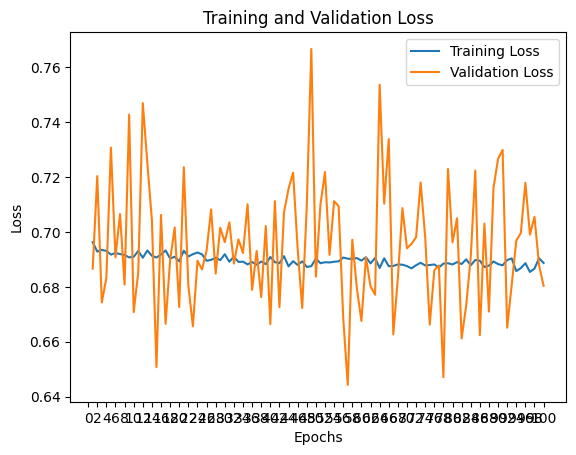

In [ ]:
# Generate a sequence of integers to represent the epoch numbers
epochs = range(1, 101)
 
# Plot and label the training and validation loss values
plt.plot(epochs, loss_train, label='Training Loss')
plt.plot(epochs, loss_val, label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
 
# Set the tick locations
plt.xticks(arange(0, 101, 2))
 
# Display the plot
plt.legend(loc='best')
plt.show()

In [ ]:
#looking at the results on the validation set

y_pred_list = []
y_true_list = []
y_proba_pred = []


model_clusters_binary.eval() 
with torch.no_grad(): 
    for X_batch, y_batch in val_loader:
        y_train_pred = model_clusters_binary(X_batch)
        y_proba_pred.append(y_train_pred.cpu().numpy().item())
        
        
        y_pred_tag = torch.round(y_train_pred) 
        

        y_pred_list.append(y_pred_tag.cpu().numpy()) 
        y_true_list.append(y_batch.cpu().numpy()) 


y_pred_list = [a.squeeze().tolist() for a in y_pred_list] 


y_true_list = [a.squeeze().tolist() for a in y_true_list] 


In [ ]:
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label being i-th class and predicted label being j-th class.

confusion_matrix(y_true_list, y_pred_list)

array([[1576, 1941],
       [ 495,  659]])

In [ ]:
print(classification_report(y_true_list, y_pred_list))


              precision    recall  f1-score   support

         0.0       0.76      0.45      0.56      3517
         1.0       0.25      0.57      0.35      1154

    accuracy                           0.48      4671
   macro avg       0.51      0.51      0.46      4671
weighted avg       0.64      0.48      0.51      4671



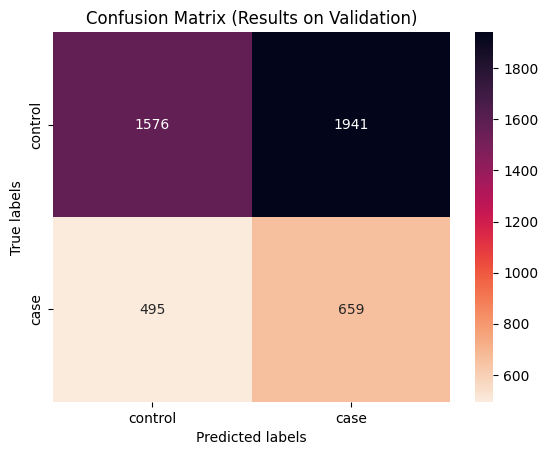

In [ ]:
#plotting the confusion matrix on the validation

labels = ['control', 'case']
cm = np.array([[1576, 1941],
       [ 495,  659]])
my_cmap = sns.cm.rocket_r
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=my_cmap)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (Results on Validation)')
ax.xaxis.set_ticklabels(['control', 'case']) 
ax.yaxis.set_ticklabels(['control', 'case'])

plt.show()

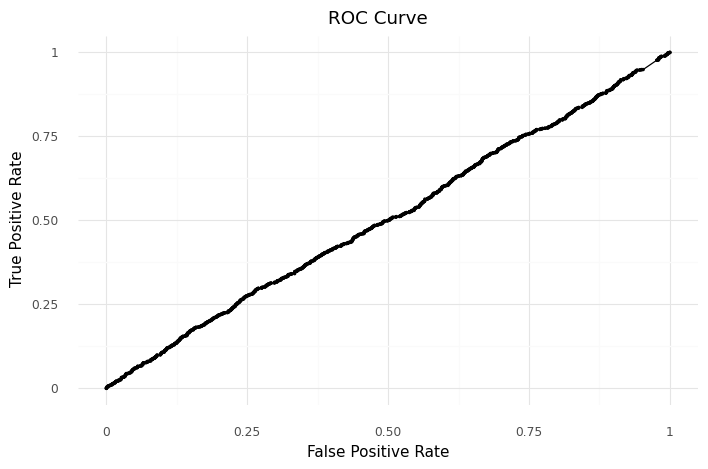

<ggplot: (8757346549095)>

In [ ]:
# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_true_list, y_proba_pred)

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

# Create the data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate')+
    ylab('True Positive Rate')+
    theme_minimal()
)

G mean is the harmonic mean of recall and specificity: produces the optimal threshold for binary classification

Best Threshold: 0.5366 with G-Mean: 0.5043
FPR: 0.476, TPR: 0.4853


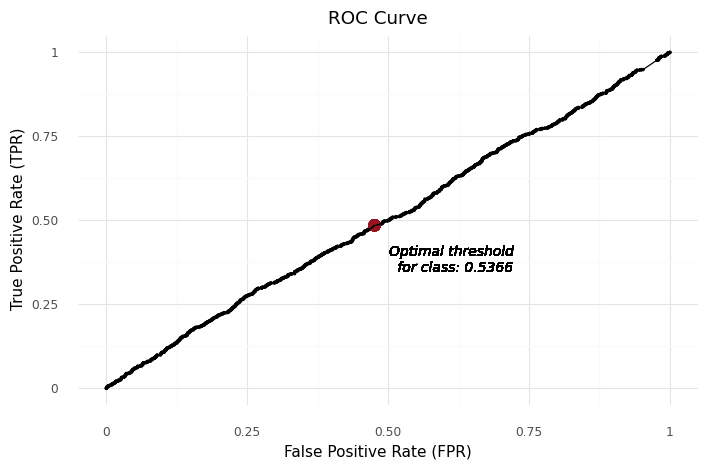

<ggplot: (8757345458833)>

In [ ]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [ ]:
#testing on the test set

y_pred_test = []
y_true_test = []
y_proba_pred_test = [] 


model_clusters_binary.eval() 
with torch.no_grad(): 
    for X_batch, y_batch in test_loader:
        y_test_pred = model_clusters_binary(X_batch)
        y_proba_pred_test.append(y_test_pred.cpu().numpy().item())
        
        
        y_pred_tag = torch.round(y_test_pred) 
        

        y_pred_test.append(y_pred_tag.cpu().numpy())
        y_true_test.append(y_batch.cpu().numpy())


y_pred_test = [a.squeeze().tolist() for a in y_pred_test] 


y_true_test = [a.squeeze().tolist() for a in y_true_test] 


In [ ]:
confusion_matrix(y_true_test, y_pred_test)

array([[28874, 29802],
       [  440,   704]])

In [ ]:
print(classification_report(y_true_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.49      0.66     58676
         1.0       0.02      0.62      0.04      1144

    accuracy                           0.49     59820
   macro avg       0.50      0.55      0.35     59820
weighted avg       0.97      0.49      0.64     59820



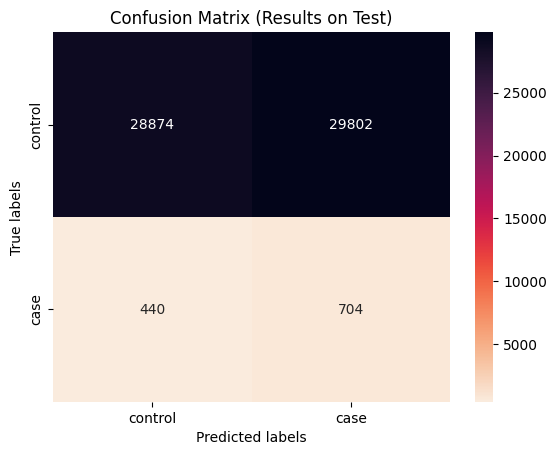

In [ ]:
#confusion matrix on the test

labels = ['control', 'case']
cm = np.array([[28874, 29802],
       [  440,   704]])
my_cmap = sns.cm.rocket_r
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=my_cmap)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix (Results on Test)')
ax.xaxis.set_ticklabels(['control', 'case']) 
ax.yaxis.set_ticklabels(['control', 'case'])

plt.show()